In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as ticker
from matplotlib import rc
from scipy.stats import chi2

In [2]:
# Matplotlib customize
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams['figure.dpi'] = 100

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.markerscale'] = 1.5
plt.rcParams['legend.borderpad'] = 0.6
plt.rcParams['legend.framealpha'] = 0.7

In [3]:
Channels = np.array([[0.,0.,1]],dtype=float)
Channels

array([[0., 0., 1.]])

In [4]:
def GetCL(n,b,s,mu):

    # Degrees of freedom
    df = 2*(n+1)

    # Poisson cumulative distribution (see Appendix)
    CLsb = 1 - chi2.cdf(2*(mu*s+b),df=df)
    CLb = 1 - chi2.cdf(2*b, df=df)

    return CLsb/CLb

In [18]:
# Parameter of interest
mu = np.linspace(0.,7.,21)

In [19]:
n = Channels[:,0]
b = Channels[:,1]
s = Channels[:,2]
Cls = GetCL(n[0],b[0],s[0],mu)
Cls

array([1.00000000e+00, 7.04688090e-01, 4.96585304e-01, 3.49937749e-01,
       2.46596964e-01, 1.73773943e-01, 1.22456428e-01, 8.62935865e-02,
       6.08100626e-02, 4.28521269e-02, 3.01973834e-02, 2.12797364e-02,
       1.49955768e-02, 1.05672044e-02, 7.44658307e-03, 5.24751840e-03,
       3.69786372e-03, 2.60584052e-03, 1.83630478e-03, 1.29402211e-03,
       9.11881966e-04])

In [20]:
# Upper limit
def GetUpperLimit(mu,Cls,alpha = 0.05):

    i = np.where( Cls <= alpha )

    if len(i[0]) == 0:
        print('--- Cls is never less than alpha --- ')
        return 0.
    else:
        i = i[0][0]

    # Saving the indez where pvalues is less than the critical value

    x0 = mu[i-1]
    x1 = mu[i]
    fx0 = Cls[i-1]
    fx1 = Cls[i]

    # Compute the slope
    m = (fx1-fx0)/(x1-x0)

    if m == 0:
        print('--- Problem with the scan ---')
        return 0.

    # 1D Polynomial interpolation
    mup = (alpha - fx0)/m + x0

    return mup

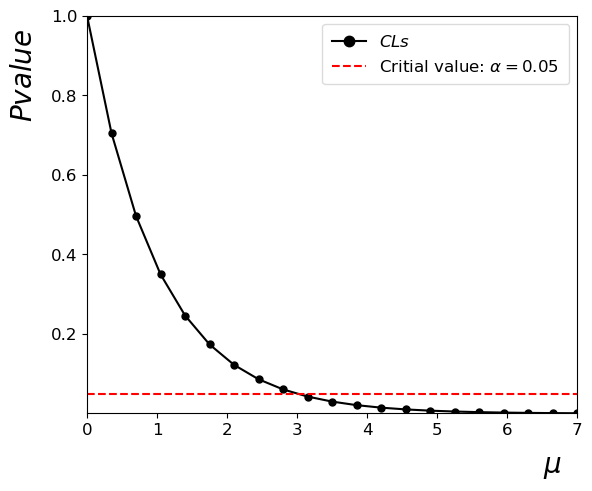

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(mu,Cls,color='k',marker='o',label=r'$CLs$')
alpha = 0.05
ax.axhline( y = alpha, color='r',ls = '--', label=r'Critial value: $\alpha= %.2f$'%(alpha) )

# Label X
ax.set_xlabel(r'$\mu$')
ax.xaxis.set_label_coords(0.95,-0.1)
ax.set_xlim(mu[0],mu[-1])

# Label Y
ax.set_ylabel(r'$Pvalue$')
ax.yaxis.set_label_coords(-0.1,0.85)
ax.set_ylim(np.min(Cls),np.max(Cls))
    
        
# Ajustar los márgenes automáticamente
plt.tight_layout()

#Legend
ax.legend(loc='upper right',bbox_to_anchor=(1,1),ncol=1,title='')

#
plt.savefig('ModifiedPValueScan.pdf')

In [22]:
GetUpperLimit(mu,Cls)

3.0106880194792613

In [24]:
# Scan for table
for n_ in range(3):
    for b_ in range(4):
        Cls = GetCL(n_,b_,s[0],mu)
        print('n:',n_, GetUpperLimit(mu,Cls))

n: 0 3.0106880194792613
n: 0 3.0106880194792627
n: 0 3.0106880194792613
n: 0 3.0106880194792645
n: 1 4.755720440990432
n: 1 4.121951909665689
n: 1 3.820666551362049
n: 1 3.6559387244532564
n: 2 6.296266528606296
n: 2 5.420491300864354
n: 2 4.830833417180846
n: 2 4.452472016488778
